In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings('ignore')

beds
Number of bedrooms in property.

baths
Number of bathrooms in property. Note 0.5 corresponds to a half-bath which has a sink and toilet but no tub or shower.

size	
Total floor area of property.
size_units
Units of the previous measurement.

lot_size
Total area of the land where the property is located on. The lot belongs to the house owner.

lot_size_units
Units of the previous measurement.

zip_code
Zip code. This is a postal code used in the USA.

price	
Price the property was sold for (US dollars).

In [62]:
train = pd.read_csv(r'house price prediction - train.csv')
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [63]:
test = pd.read_csv(r'house price prediction - test.csv')
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


merubah value dari data train dan test, yang memiliki satuan acre lalu dikonversikan menjadi sqft

In [64]:
acre_rows = train[train['lot_size_units'] == 'acre']
acre_rows['lot_size'] = acre_rows['lot_size'] * 43560
acre_rows['lot_size_units'] = 'sqft'

train.update(acre_rows)

In [65]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3.0,2.5,2590.0,sqft,6000.0,sqft,98144.0,795000.0
1,4.0,2.0,2240.0,sqft,13503.6,sqft,98106.0,915000.0
2,4.0,3.0,2040.0,sqft,3783.0,sqft,98107.0,950000.0
3,4.0,3.0,3800.0,sqft,5175.0,sqft,98199.0,1950000.0
4,2.0,2.0,1042.0,sqft,NaN,NaN,98102.0,950000.0


In [66]:
acre_rows = test[test['lot_size_units'] == 'acre']
acre_rows['lot_size'] = acre_rows['lot_size'] * 43560
acre_rows['lot_size_units'] = 'sqft'

test.update(acre_rows)

In [67]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3.0,3.0,2850.0,sqft,4200.0,sqft,98119.0,1175000.0
1,4.0,5.0,3040.0,sqft,5002.0,sqft,98106.0,1057500.0
2,3.0,1.0,1290.0,sqft,6048.0,sqft,98125.0,799000.0
3,3.0,2.0,2360.0,sqft,12196.8,sqft,98188.0,565000.0
4,3.0,3.5,1942.0,sqft,1603.0,sqft,98107.0,1187000.0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   float64
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   float64
 7   price           2016 non-null   float64
dtypes: float64(6), object(2)
memory usage: 126.1+ KB


In [69]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1.669000e+03,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,1.878995e+04,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2.880682e+05,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,5.000000e+02,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,2.734000e+03,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,5.000000e+03,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,7.389000e+03,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,1.089000e+07,98199.000000,2.500000e+07


In [70]:
train.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

ada 347 baris yang missing value pada kolom lot_size dan lot_size_units dalam data train

In [71]:
train.duplicated().sum()

9

ada 9 data duplikat yang ada didalam data train

disini saya memustuskan untuk menghapus data yang hilang atau missing value

In [72]:
train = train.dropna()

In [73]:
train.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [74]:
train.shape

(1669, 8)

Mengindentifikasi data duplikat pada data train

In [75]:
duplikat_train = train.duplicated(keep = False)
baris_train_duplikat = train[duplikat_train]
baris_train_duplikat.sort_values(by = ['zip_code','price'], ascending = [True, True])

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
675,3.0,3.0,1880.0,sqft,2200.0,sqft,98107.0,999950.0
1146,3.0,3.0,1880.0,sqft,2200.0,sqft,98107.0,999950.0
530,3.0,2.5,1810.0,sqft,1436.0,sqft,98107.0,1000000.0
653,3.0,2.5,1810.0,sqft,1436.0,sqft,98107.0,1000000.0
744,2.0,2.0,1020.0,sqft,776.0,sqft,98118.0,605000.0
839,2.0,2.0,1020.0,sqft,776.0,sqft,98118.0,605000.0
351,2.0,2.0,1200.0,sqft,1247.0,sqft,98122.0,705000.0
1487,2.0,2.0,1200.0,sqft,1247.0,sqft,98122.0,705000.0
310,2.0,2.0,1170.0,sqft,588.0,sqft,98144.0,624999.0
1400,2.0,2.0,1170.0,sqft,588.0,sqft,98144.0,624999.0


pendapat saya tentang data duplikat diatas adalah kemungkinan property tersebut merupakan property yang identik, jadi soal fitur-fitur dan harga yang tertera bisa dipastikan sama. Keputusan saya selanjutnya adalah tidak menghapus data duplikat pada data train.

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    float64
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    float64
 7   price           505 non-null    float64
dtypes: float64(6), object(2)
memory usage: 31.7+ KB


In [77]:
test.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,8961.000000,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,18946.203047,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,529.000000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,3479.250000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,5011.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,7500.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,176853.600000,98199.000000,6.250000e+06


In [78]:
test.shape

(505, 8)

In [79]:
test.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

ada 77 baris yang missing value pada data test, missing value tersebut berada pada kolom lot_size dan lot_size_units

In [80]:
test = test.dropna()

In [81]:
test.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

Sama seperti data train, missing value pada baris data diputuskan untuk didrop atau delete.

In [82]:
test.duplicated().sum()

1

In [83]:
duplikat_test = test.duplicated(keep = False)
baris_duplikat_test = test[duplikat_test]
baris_duplikat_test

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
197,1.0,1.0,376.0,sqft,10018.8,sqft,98199.0,1000000.0
264,1.0,1.0,376.0,sqft,10018.8,sqft,98199.0,1000000.0


Keputusan saya untuk data test yang duplikat sama dengan data train, tidak dihapus, karena saya menduga bahwa data tersebut adalah property identik.

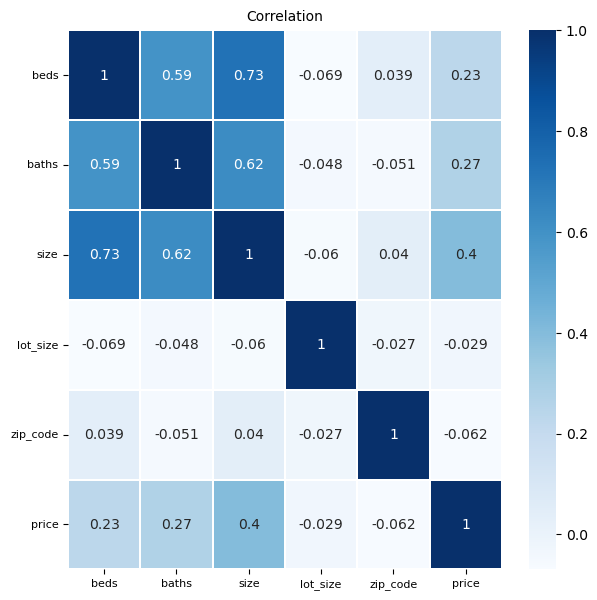

In [84]:
train_corr = train.corr()
plt.figure(figsize = (7,7))
sns.heatmap(train_corr, annot = True, linewidth = 0.3, cmap = 'Blues')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8, rotation = 0)
plt.title("Correlation", fontsize = 10, pad = 7)
plt.show()

dari hasil heatmap diatas, dapat disimpulkan bahwa ada 7 korelasi antar kolom dan kolom :
- Kolom price dan beds memiliki korelasi sebesar 23%
- Kolom price dan bath memiliki korelasi sebesar 27%
- Kolom price dan size memiliki korelasi sebesar 40%
- Kolom size dan beds memiliki korelasi sebesar 73%
- kolom size dan baths memiliki korelasi sebesar 62%
- kolom baths dan beds memiliki korelasi sebesar 59%

Mari kita visualisasikan hubungan kolom-kolom yang memiliki korelasi diatas menggunakan scatterplot

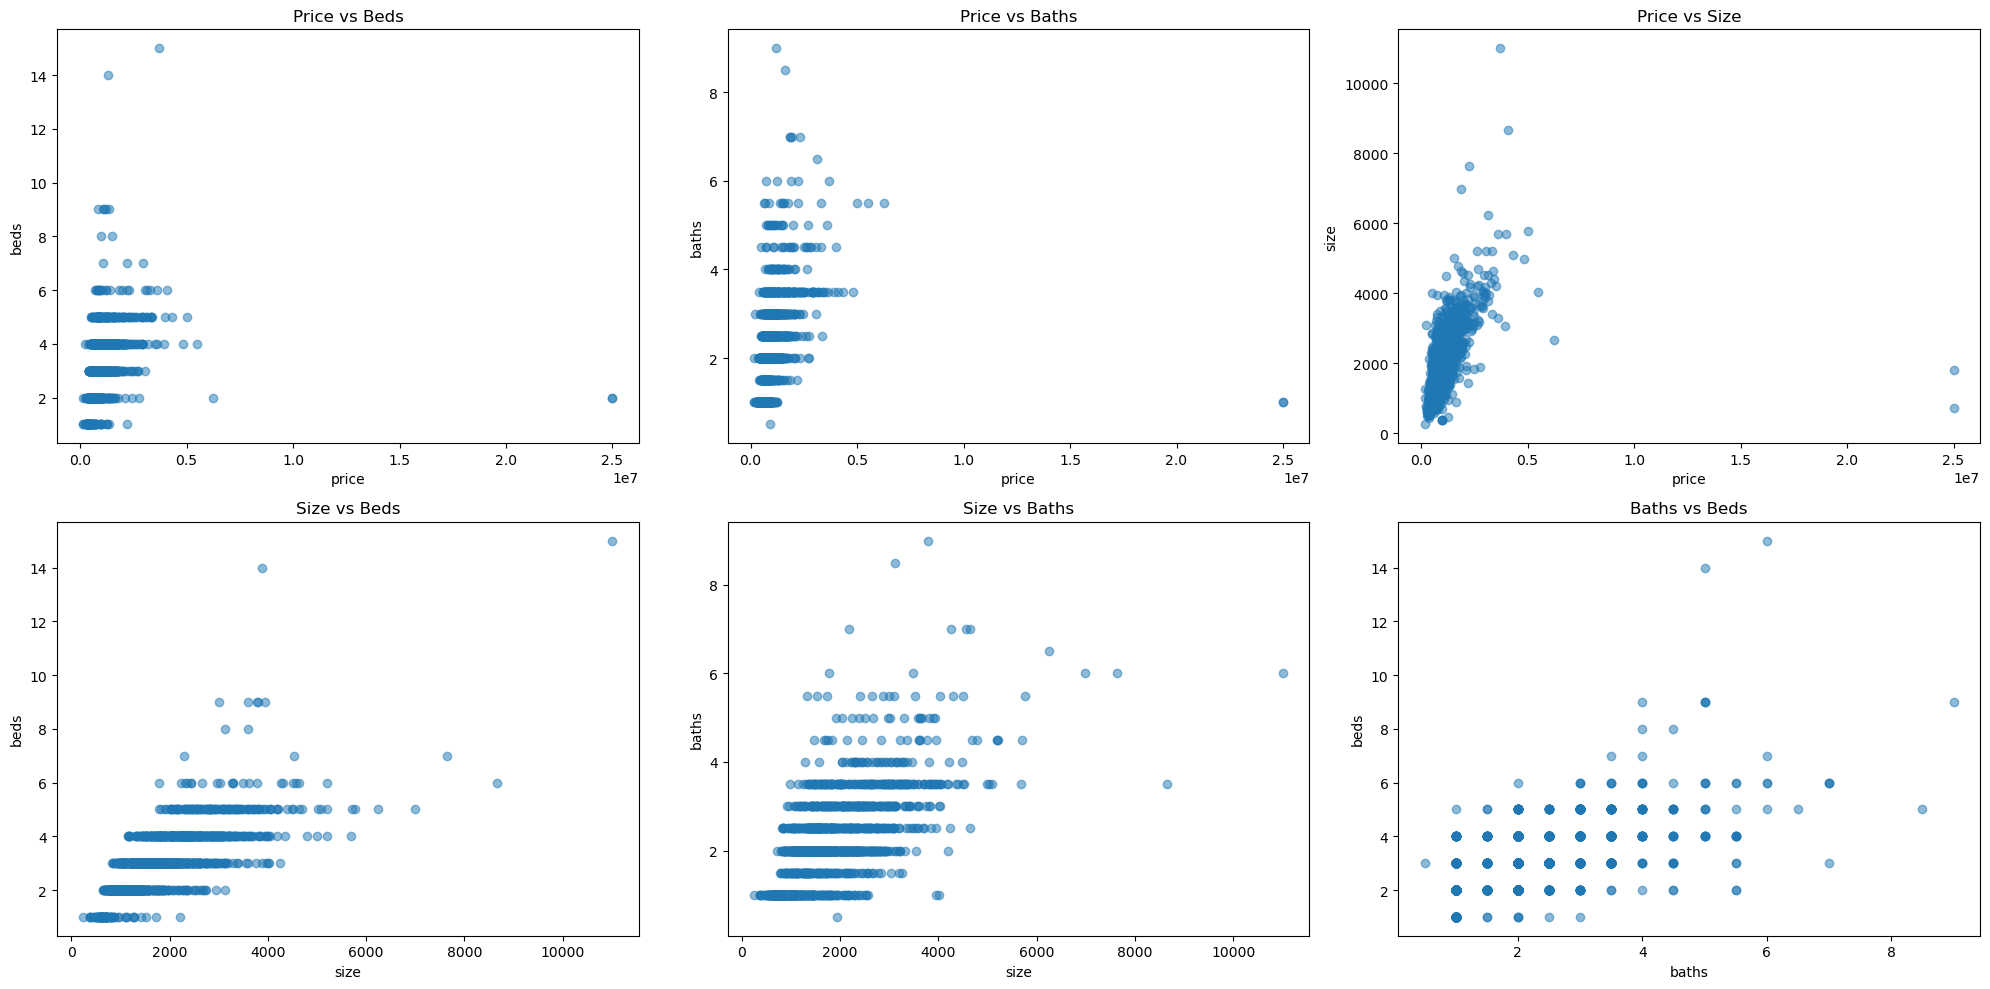

In [85]:
fig, axes = plt.subplots(2,3, figsize = (20,10))

# Scatter plot 1
axes[0, 0].scatter(train['price'], train['beds'], alpha=0.5)
axes[0, 0].set_xlabel("price")
axes[0, 0].set_ylabel("beds")
axes[0, 0].set_title("Price vs Beds")

# Scatter plot 2
axes[0, 1].scatter(train['price'], train['baths'], alpha=0.5)
axes[0, 1].set_xlabel("price")
axes[0, 1].set_ylabel("baths")
axes[0, 1].set_title("Price vs Baths")

# Scatter plot 3
axes[0, 2].scatter(train['price'], train['size'], alpha=0.5)
axes[0, 2].set_xlabel("price")
axes[0, 2].set_ylabel("size")
axes[0, 2].set_title("Price vs Size")

# Scatter plot 4
axes[1, 0].scatter(train['size'], train['beds'], alpha=0.5)
axes[1, 0].set_xlabel("size")
axes[1, 0].set_ylabel("beds")
axes[1, 0].set_title("Size vs Beds")

# Scatter plot 5
axes[1, 1].scatter(train['size'], train['baths'], alpha=0.5)
axes[1, 1].set_xlabel("size")
axes[1, 1].set_ylabel("baths")
axes[1, 1].set_title("Size vs Baths")

# Scatter plot 6
axes[1, 2].scatter(train['baths'], train['beds'], alpha=0.5)
axes[1, 2].set_xlabel("baths")
axes[1, 2].set_ylabel("beds")
axes[1, 2].set_title("Baths vs Beds")

plt.tight_layout()
plt.show()

Drop fitur atau kolom yang tidak digunakan dalam analisis regresi dalam kasus ini, seperti fitur size_units dan lot_size_units pada data train dan test

In [86]:
drop_kolom = ['size_units', 'lot_size_units']
train = train.drop(columns = drop_kolom, axis = 1)
test = test.drop(columns = drop_kolom, axis = 1)

In [87]:
train.head()

,beds,baths,size,lot_size,zip_code,price
0,3.0,2.5,2590.0,6000.0,98144.0,795000.0
1,4.0,2.0,2240.0,13503.6,98106.0,915000.0
2,4.0,3.0,2040.0,3783.0,98107.0,950000.0
3,4.0,3.0,3800.0,5175.0,98199.0,1950000.0
5,2.0,2.0,1190.0,43560.0,98107.0,740000.0


In [88]:
test.head()

,beds,baths,size,lot_size,zip_code,price
0,3.0,3.0,2850.0,4200.0,98119.0,1175000.0
1,4.0,5.0,3040.0,5002.0,98106.0,1057500.0
2,3.0,1.0,1290.0,6048.0,98125.0,799000.0
3,3.0,2.0,2360.0,12196.8,98188.0,565000.0
4,3.0,3.5,1942.0,1603.0,98107.0,1187000.0


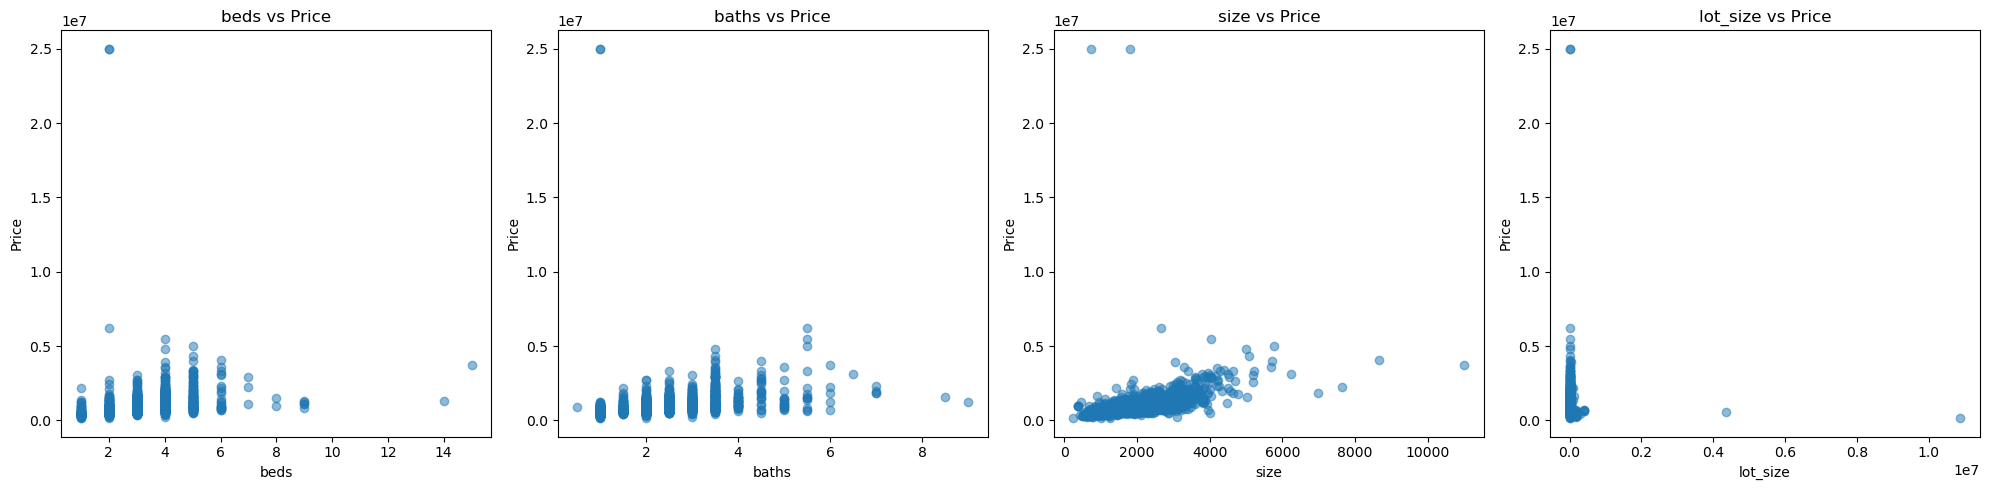

In [89]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
features = ['beds', 'baths', 'size', 'lot_size']

for i, feature in enumerate(features):
    ax[i].scatter(train[feature], train['price'], alpha = 0.5)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel("Price")
    ax[i].set_title(f"{feature} vs Price")
plt.tight_layout()
plt.show()

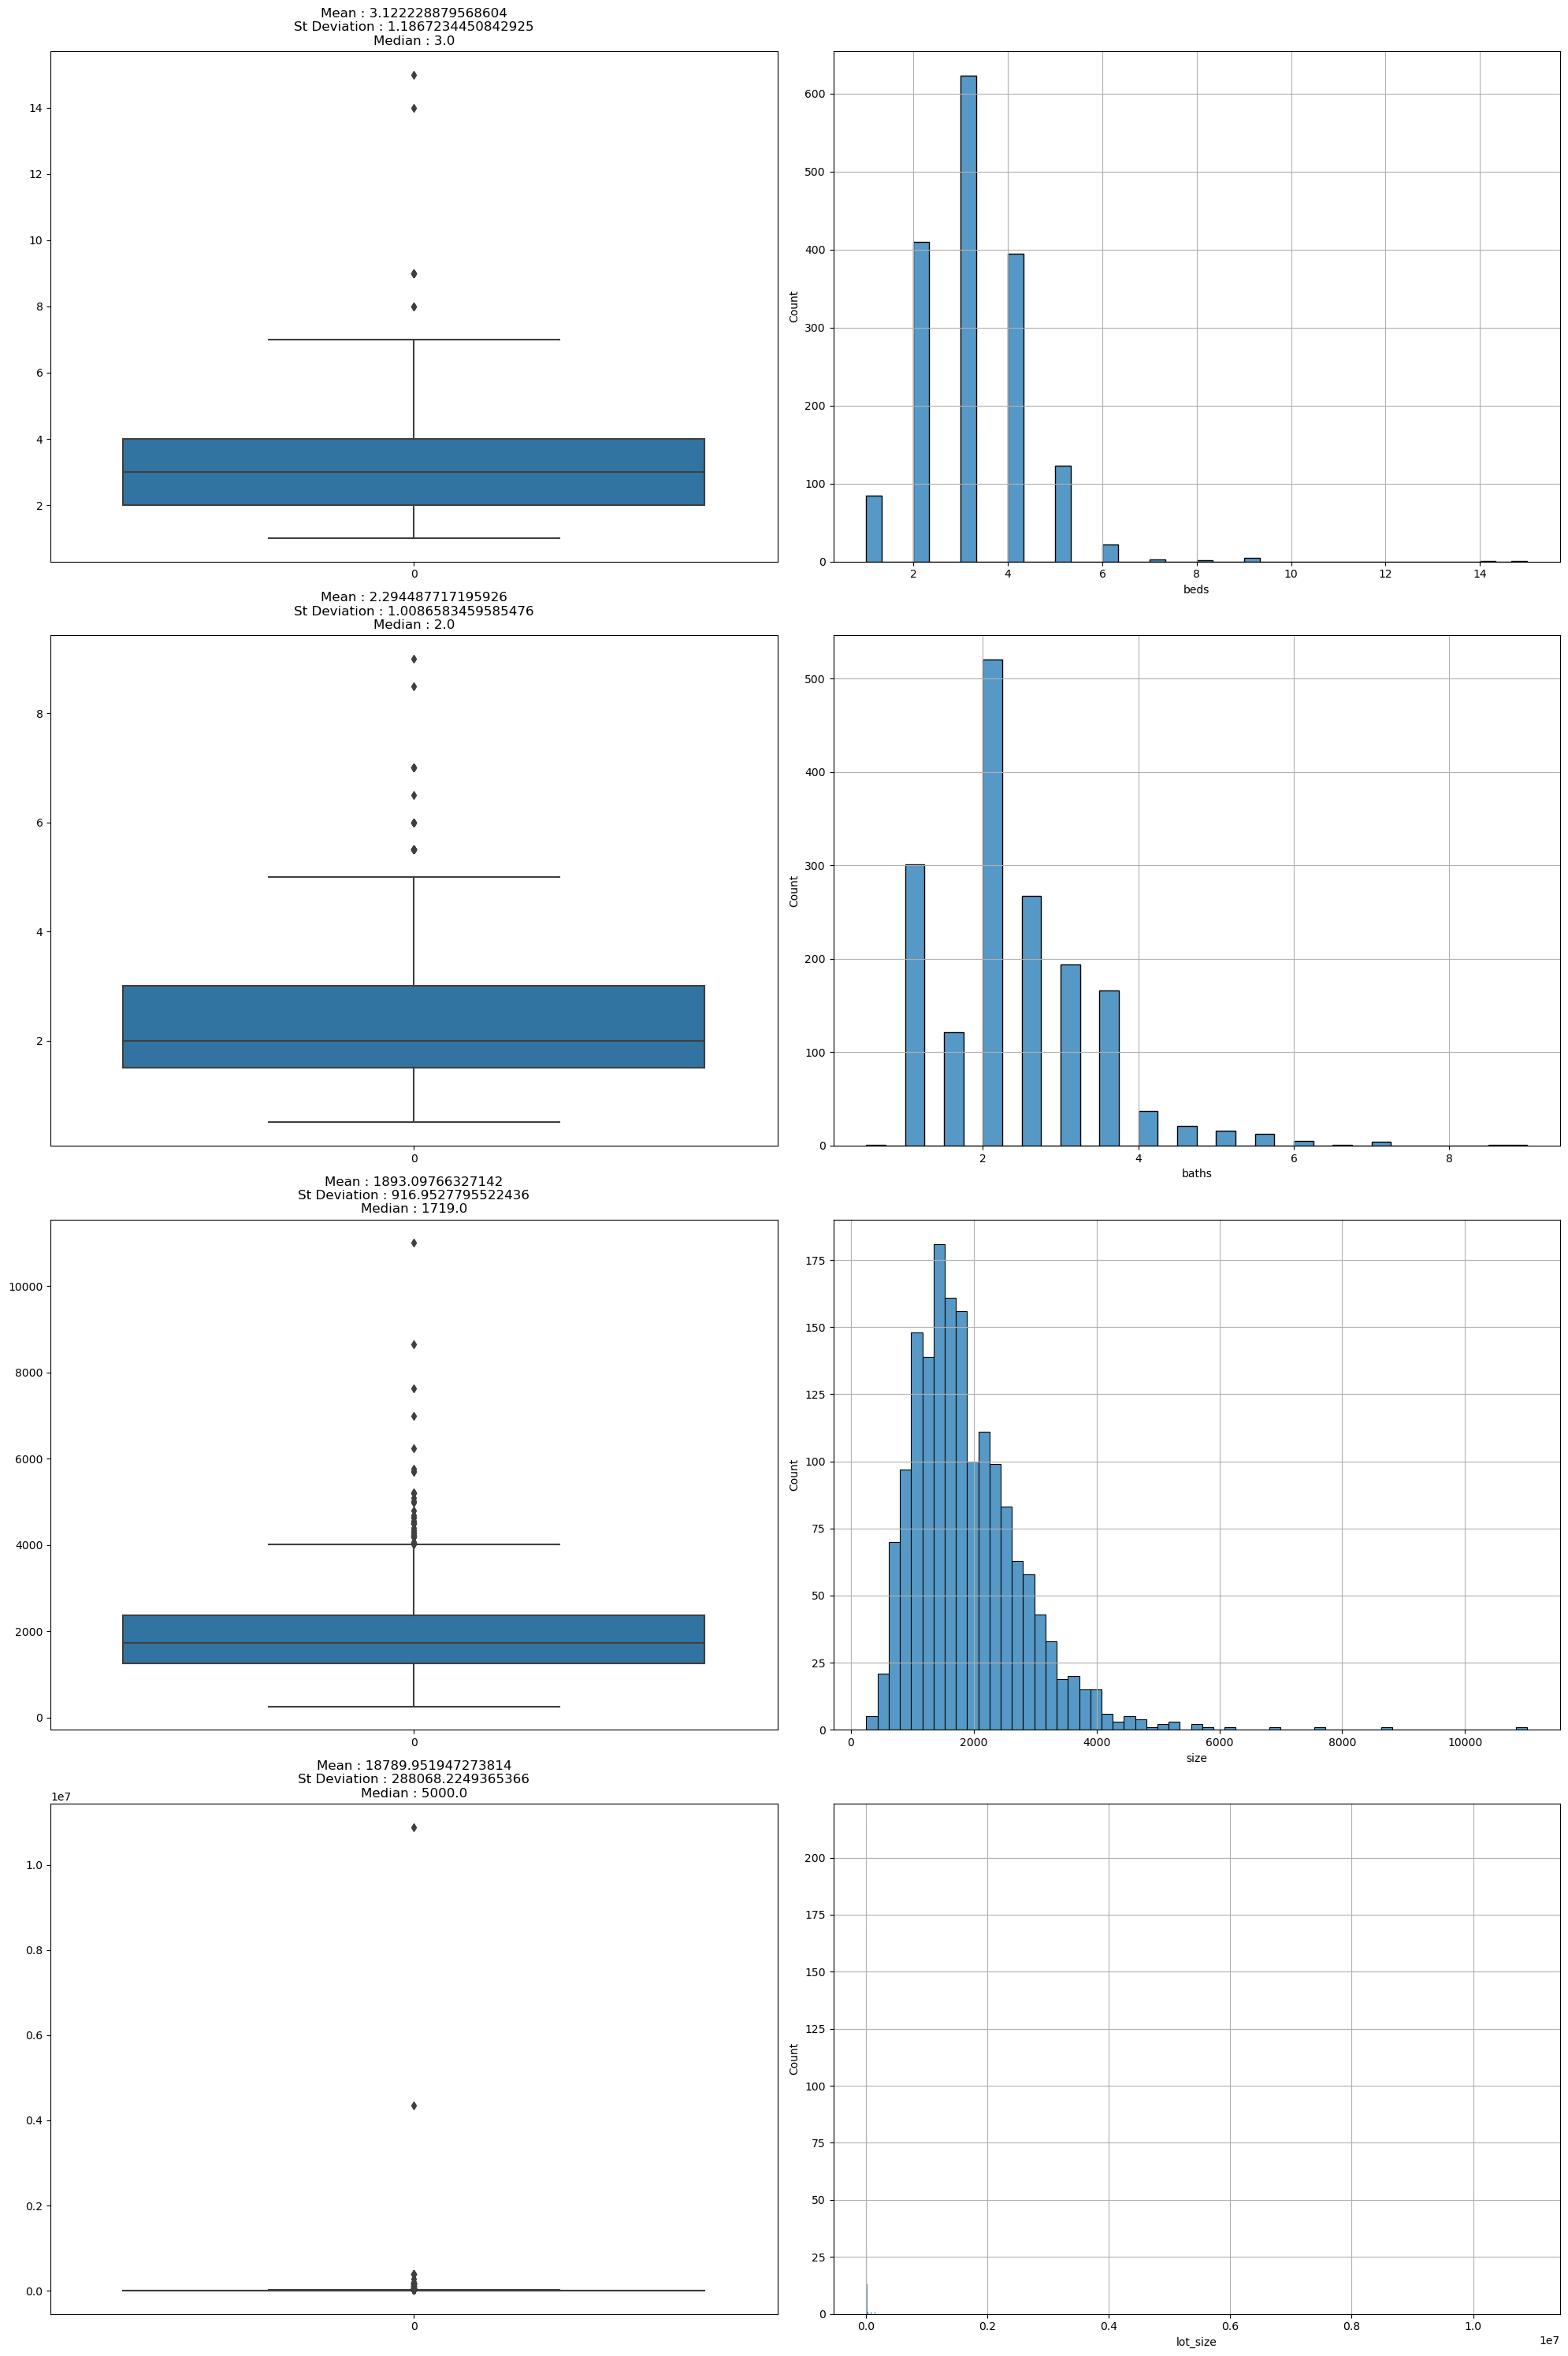

In [90]:
def cek_outliers(features):
    fig, ax = plt.subplots(4,2, figsize = (20,30))
    for i, feature in enumerate(features):
        sns.boxplot(train[feature], ax=ax[i][0])
        sns.histplot(train[feature], ax=ax[i][1])
        ax[i][0].set_title("Mean : {}\nSt Deviation : {}\nMedian : {}".format(train[feature].mean(),
                                                                             train[feature].std(),
                                                                             train[feature].median()))
        ax[i][1].grid(True)
    plt.tight_layout()
    plt.show()

cek_outliers(features)

Dari hasil boxplot dan histogram menunjukan bahwa adanya outliers pada fitur fitur yang akan digunakan untuk analisis regresi

Namun keputusan selanjutnya adalah tidak menghapus outliers tersebut karena, fitur-fitur tersebut memungkinkan memiliki data yang bervariasi, karena fitur tersebut adalah karakteristik dari sebuah rumah yang seharusnya memiliki nilai subjektif

### Modeling

In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [92]:
kolom = ['beds', 'baths', 'size', 'lot_size', 'zip_code']
x_train = train[kolom].copy()

In [93]:
y_train = train['price']

x_test = test[kolom].copy()
y_test = test['price']

In [94]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1669, 5) (1669,) (428, 5) (428,)


In [95]:
scaler = StandardScaler()

x_train = scaler.fit_transform(train[kolom])
x_train = pd.DataFrame(data=x_train,columns=train[kolom].columns,index=train.index)
x_train.head()

,beds,baths,size,lot_size,zip_code
0,-0.103028,0.203809,0.760248,-0.044412,0.841380
1,0.739881,-0.292047,0.378434,-0.018357,-0.799872
2,0.739881,0.699666,0.160255,-0.052111,-0.756681
3,0.739881,0.699666,2.080231,-0.047277,3.216877
5,-0.945937,-0.292047,-0.767006,0.086013,-0.756681


In [96]:
x_test = scaler.fit_transform(test[kolom])
x_test = pd.DataFrame(data = x_test, columns = test[kolom].columns, index = test.index)
x_test.head()

,beds,baths,size,lot_size,zip_code
0,-0.173524,0.640284,0.932701,-0.251585,-0.301003
1,0.710622,2.604739,1.143386,-0.209205,-0.796795
2,-0.173524,-1.324171,-0.797139,-0.153931,-0.072177
3,-0.173524,-0.341944,0.389354,0.170989,2.330504
4,-0.173524,1.131398,-0.074154,-0.388817,-0.758657


In [97]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(x_test)

In [99]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score : {}".format(r2))
print("MSE : {}".format(mse))
print("MAE : {}".format(mae))

R2 Score : 0.49691582675152135
MSE : 192276108774.86893
MAE : 273176.0054812675


In [100]:
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : {}".format(rmse))

RMSE : 438492.9974068787


In [101]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE : ", mape)

MAPE :  27.750302352811328


In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {'alpha': [0.1, 1, 5, 10, 100]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv = 3, scoring = 'neg_mean_absolute_error')
ridge_cv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100]},
             scoring='neg_mean_absolute_error')

In [104]:
print("Best Hyperparameters : ", ridge_cv.best_params_)

Best Hyperparameters :  {'alpha': 100}


In [105]:
best_ridge = ridge_cv.best_estimator_
best_ridge.fit(x_train, y_train)

Ridge(alpha=100)

In [106]:
y_pred = best_ridge.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score : {}".format(r2))
print("MSE : {}".format(mse))
print("MAE : {}".format(mae))

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : {}".format(rmse))

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE : ", mape)

R2 Score : 0.4951413344557035
MSE : 192954310340.00208
MAE : 268548.53644069703
RMSE : 439265.64894150564
MAPE :  27.313656277879662
